In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Lasso
from sklearn.metrics import roc_auc_score, auc, roc_curve, confusion_matrix
from sklearn.model_selection import cross_val_score, train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report
from test_function import *
import random
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from test_function import *
from sklearn.ensemble import GradientBoostingClassifier
import math
import scipy.stats as stats
import statsmodels.api as sm
import pylab as pl

In [2]:
alldata = pd.read_csv('allmodel_denovo.csv', sep = '\t')

In [146]:
original_column = ['SIFT_pred','LRT_pred', 'MA_pred', 'PROVEN_pred', 'SLR_score', 'SIFT_score','LRT_omega', 
                'MA_score', 'PROVEN_score', 'Grantham', 'HMMEntropy','HMMRelEntropy', 'PredRSAB', 'PredRSAI', 
                'PredRSAE','PredBFactorF', 'PredBFactorM', 'PredBFactorS', 'PredStabilityH','PredStabilityM', 
                'PredStabilityL', 'PredSSE', 'PredSSH','PredSSC', 'dscore', 'phyloP_pri', 'phyloP_mam','phyloP_ver',
                   'RNA_seq','UNEECON']

# the features for comparison (to other supervised score)
features = [ 'MetaSVM_score', 'MetaLR_score', 'M-CAP_score', 'REVEL_score','ClinPred_score','CADD_phred_hg19',
            'DANN_score']

x_column  = original_column + ['M-CAP_score', 'REVEL_score']
y_column = 'source'


originaldata = alldata[alldata['source'] == 0] #46787
denovo = alldata[alldata['source'] ==1] #5985

y = originaldata.loc[:,[y_column]].values.flatten()
X = originaldata.loc[:,x_column]

X_denovo = denovo.loc[:,x_column]
y_denovo = denovo.loc[:,[y_column]].values.flatten()

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)
Xtrain_denovo, Xtest_denovo, ytrain_denovo, ytest_denovo = train_test_split(X_denovo,y_denovo, test_size = 0.3, random_state = 42)


X_train = pd.concat([X_train, Xtrain_denovo], join= 'inner')
y_train = np.concatenate((y_train, np.full((1,4189),1).flatten())).flatten()

X_test = pd.concat([X_test, Xtest_denovo], join= 'inner')
y_test = np.concatenate((y_test, np.full((1,1796),1).flatten())).flatten()

regression = LogisticRegression(random_state = 42 , solver = 'lbfgs',max_iter = 150).fit(X_train, y_train)

y_hat = regression.predict_proba(X_test)[:,1]

In [94]:
print(X_train.shape)  #36939
print(X_test.shape)   #15833

print(Xtrain_denovo.shape) #4189
print(Xtest_denovo.shape)  #1796

(36939, 32)
(15833, 32)
(4189, 32)
(1796, 32)


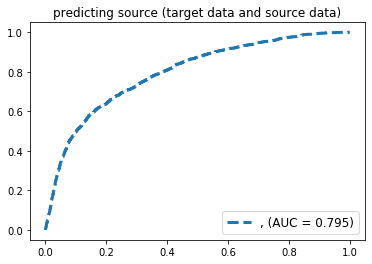

In [147]:
#X_train, X_test, y_train, y_test, y_hat, regression = splitNfit(alldata, x_column, y_column, testsize = 0.3)
drawROC(y_test, y_hat, title = 'predicting source (target data and source data)', lastone = True)

In [126]:
coef_overall = regression.coef_.flatten()
coefficient = pd.DataFrame({'regression':coef_overall}, index = original_column)
coefficient['regression'].sort_values()

PROVEN_pred      -0.452758
MA_pred          -0.348620
PredSSH          -0.191440
phyloP_pri       -0.162878
PROVEN_score     -0.134679
LRT_pred         -0.130182
HMMRelEntropy    -0.104857
PredSSE          -0.101399
phyloP_ver       -0.096286
SIFT_pred        -0.087077
PredBFactorS     -0.080865
PredBFactorF     -0.078979
Grantham         -0.069717
PredBFactorM     -0.057967
PredSSC          -0.044322
LRT_omega        -0.007582
SIFT_score        0.022054
MA_score          0.033707
RNA_seq           0.035137
SLR_score         0.038691
phyloP_mam        0.044968
dscore            0.056360
HMMEntropy        0.119593
UNEECON           0.218703
PredRSAB          0.301127
PredRSAI          0.304063
PredRSAE          0.565919
PredStabilityM    0.824202
PredStabilityL    1.872014
PredStabilityH    1.890307
Name: regression, dtype: float64

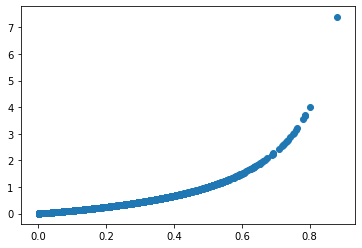

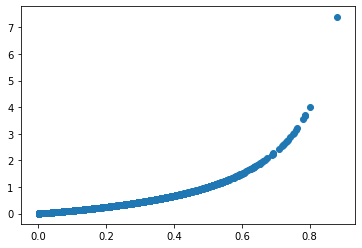

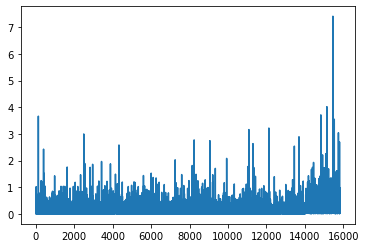

In [148]:
#clinvar + DDD
instance_weight = y_hat/(1-y_hat)
instance_weight_new = instance_weight[:14037]

# remove testing data that come from denovo set
ytest_denovo.shape #1796

#only clinvar
instance_weight_new = instance_weight[:14037]
instance_weight_new.shape #14037

y_hat_new = y_hat[:14037]

plt.scatter(y_hat, instance_weight)
plt.show()
instance_weight_round = np.around(instance_weight)
plt.scatter(y_hat, instance_weight)
plt.show()
plt.plot(instance_weight)
plt.show()
#np.count_nonzero(np.around(instance_weight))

In [135]:
instance_weight[instance_weight > 0.5]

array([0.51869033, 0.55247028, 0.52680937, 0.598759  , 0.50511674])

In [143]:
instance_weight.shape # 1796 DDD, 

(15833,)

(array([1.5472e+04, 3.1200e+02, 2.9000e+01, 1.1000e+01, 6.0000e+00,
        2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([1.15576562e-03, 7.41851141e-01, 1.48254652e+00, 2.22324189e+00,
        2.96393727e+00, 3.70463264e+00, 4.44532802e+00, 5.18602339e+00,
        5.92671877e+00, 6.66741414e+00, 7.40810952e+00]),
 <a list of 10 Patch objects>)

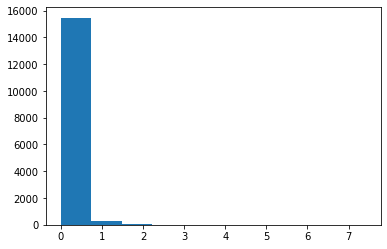

In [149]:
plt.hist(instance_weight)

In [67]:
instance_weight_new.shape
y_hat.shape

(15833,)

In [137]:
#compute class weight
originaldata = alldata[alldata['source'] == 0] #46787
denovo = alldata[alldata['source'] ==1] 

Xtrain_denovo.shape

Xtrain.shape
classweight = {1:Xtrain.shape[0]/(Xtrain_denovo.shape[0]+Xtrain.shape[0]), 0:Xtrain_denovo.shape[0]/(Xtrain_denovo.shape[0]+Xtrain.shape[0])}

In [138]:
classweight

{1: 0.886596821787271, 0: 0.11340317821272909}

In [150]:

# training data here

X = originaldata.loc[:,x_column]
y = originaldata.loc[:,['result']].values.flatten()
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size = 0.3, random_state = 42)

denovo = pd.read_csv('denovo_data.csv', sep = '\t')
X_test_denovo = denovo.loc[:,x_column]
y_test_denovo = denovo.loc[:,['result']].values


# fit denovo data using training data with instance weight
transfer_LGR = LogisticRegression(random_state = 42 , solver = 'lbfgs', class_weight = classweight).fit(Xtest, ytest, sample_weight = instance_weight_new)
y_hat_denovo = transfer_LGR.predict_proba(X_test_denovo)[:,1]

LGR = LogisticRegression(random_state = 42 , solver = 'lbfgs').fit(Xtest, ytest)
y_hat_denovo_ori = LGR.predict_proba(X_test_denovo)[:,1]

LGR2 = LogisticRegression(random_state = 42 , solver = 'lbfgs',max_iter = 150).fit(Xtrain, ytrain)
y_hat_denovo_ori2 = LGR2.predict_proba(X_test_denovo)[:,1]

In [102]:
coef_overall = transfer_LGR.coef_.flatten()
coefficient = pd.DataFrame({'regression':coef_overall}, index = original_column)
coefficient['regression'].sort_values()

(15833,)

In [42]:
print(instance_weight.shape)
print(Xtest.shape)

(14036,)
(14037, 32)


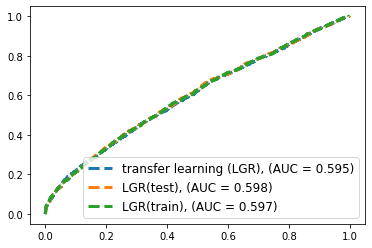

In [151]:
drawROC(y_test_denovo, y_hat_denovo, label = 'transfer learning (LGR)')
drawROC(y_test_denovo, y_hat_denovo_ori, label = 'LGR(test)')
drawROC(y_test_denovo, y_hat_denovo_ori2, label = 'LGR(train)', lastone = True)


In [72]:
def enrichment(df, portion, features, log = True, plot = True):
    num = int(df.shape[0]*portion*0.01)
    oddsratios = []
    errors = []
    for i in features:
    
        df[i] = pd.to_numeric(df[i])
        top = np.sum(df.nlargest(num,i)['result']) 
        array1 = [top, num-top]
              
        tail = np.sum(df.nsmallest(df.shape[0]-num,i)['result'])
        array2 = [tail, df.shape[0]-num-tail]

        
        result = sm.stats.Table2x2(np.asarray([array1, array2])).oddsratio
    
        if(log == True):
            result = math.log2(result)
            #result = math.log(result)
        #print(result)
        oddsratios.append(result)

        # check
        #print((top/(num-top))/(tail/(df.shape[0]-num-tail)))
        

        # change of base
        error = math.sqrt(1/top + 1/(num-top) + 1/tail + 1/(df.shape[0]-num-tail))* math.log2(math.e)
        #error = math.sqrt(1/top + 1/(num-top) + 1/tail + 1/(df.shape[0]-num-tail))
        errors.append(error)
     
    # Build the plot
    if(plot == True):
        fig, sub = plt.subplots(figsize=(18, 7))
    
        sub.bar(features, oddsratios,yerr=errors, align='center', alpha=0.5, ecolor='black', capsize=5)
   
        plt.ylabel("log2 enrichment of proband denovo data")
    
        plt.title("enrichment test, enrichment level = %s percent"%portion)
    
        plt.show()
            
    return(oddsratios, np.asarray([array1,array2]))    


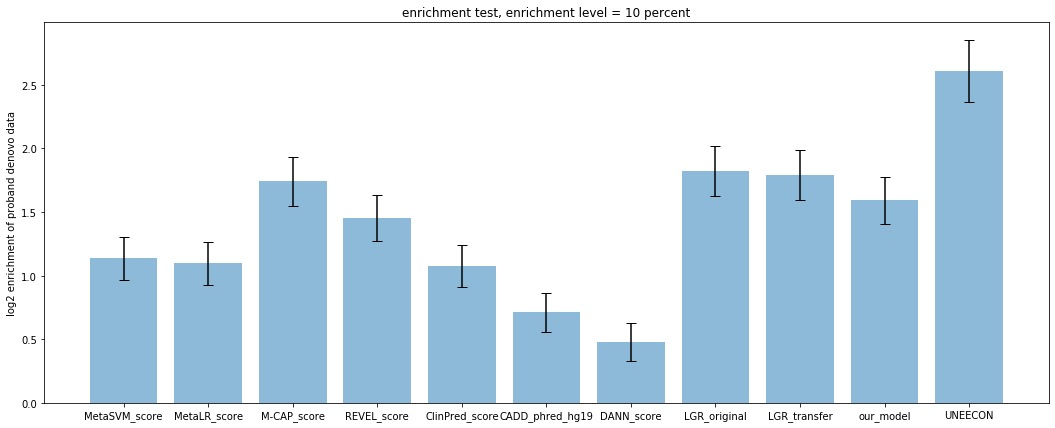

([1.1358827463279577,
  1.096848432033386,
  1.7408660086950296,
  1.4500995490997357,
  1.0775634858238041,
  0.7117291887539086,
  0.4787694421295965,
  1.8199683038704768,
  1.7932577377719028,
  1.5912078149529205,
  2.606006297511022],
 array([[ 559,   39],
        [3781, 1606]]))

In [152]:
features = [ 'MetaSVM_score', 'MetaLR_score', 'M-CAP_score', 'REVEL_score','ClinPred_score','CADD_phred_hg19','DANN_score']

denovo['LGR_original'],denovo['LGR_transfer'],denovo['our_model'] = [y_hat_denovo_ori,y_hat_denovo, denovo_gb[1]]

features = features + ['LGR_original', 'LGR_transfer', 'our_model', 'UNEECON']

enrichment(denovo,10, features)

In [75]:
denovo[['our_model','LGR_transfer']]

,our_model,LGR_transfer
0,0.953930,0.125232
1,-1.322858,0.019479
2,-1.945298,0.004796
3,-2.947545,0.004680
4,-1.404344,0.016560
...,...,...
5980,-0.066988,0.092738
5981,-2.683431,0.007082
5982,-1.131317,0.008011
5983,-2.846104,0.008747


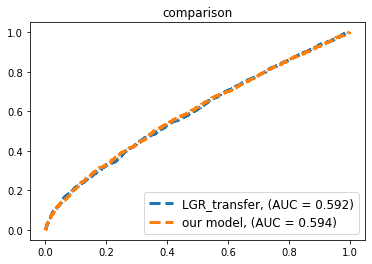

In [241]:

print(enrichment(denovo, 10, ['LGR_transfer'], plot = False))
enrichment(denovo, 10, ['our_model'], plot = False)
drawROC(y_test_denovo, y_hat_denovo, label = 'LGR_transfer')
drawROC(denovo_gb[0], denovo_gb [1], label = 'our model', lastone = True, title = 'comparison')

In [79]:
# gb + sample weight


Xtraindb, Xtestdb, ytraindb, ytestdb = train_test_split(X,y, test_size = 0.3, random_state = 42)


tuned_parameters = {"learning_rate" : [0.05,0.1,0.15], 
                   "n_estimators": [100,150,200],
                    "max_depth": [3,5,8]}

tuning(Xvalid, yvaliddb, 'gradient boosting', tuned_parameters)




# Tuning hyper-parameters for recall



/storage/home/jkl5991/.conda/envs/sanEnv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best parameters set found on development set:
{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
With score : 0.870

Grid scores on development set:

0.870 (+/-0.006) for {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
0.868 (+/-0.010) for {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 150}
0.867 (+/-0.014) for {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}
0.857 (+/-0.009) for {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100}
0.858 (+/-0.011) for {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 150}
0.856 (+/-0.005) for {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200}
0.852 (+/-0.001) for {'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 100}
0.856 (+/-0.009) for {'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 150}
0.859 (+/-0.007) for {'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 200}
0.864 (+/-0.006) for {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
0.863 (+/-0.001) for 

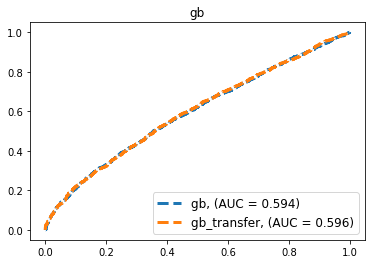

In [153]:
denovo_gb_transfer = GradientBoosting = GradientBoostingClassifier(learning_rate = 0.05, max_depth = 3, n_estimators = 100, subsample = 1)
denovo_gb_transfer = denovo_gb_transfer.fit(Xtestdb, ytestdb, sample_weight = instance_weight_new)
yhat_gb_transfer = denovo_gb_transfer.decision_function(X_test_denovo)


drawROC(denovo_gb[0], denovo_gb[1], label = 'gb')
drawROC(y_test_denovo, yhat_gb_transfer, label = 'gb_transfer', lastone = True, title = 'gb')


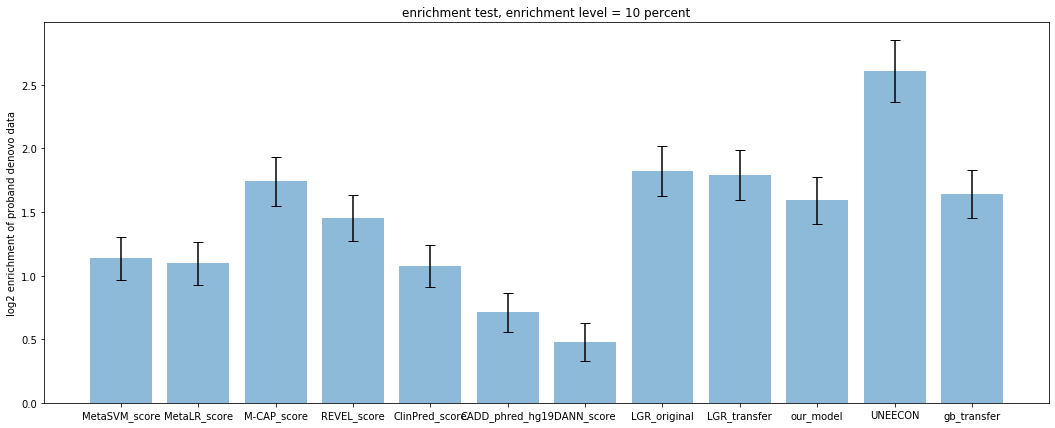

([1.1358827463279577,
  1.096848432033386,
  1.7408660086950296,
  1.4500995490997357,
  1.0775634858238041,
  0.7117291887539086,
  0.4787694421295965,
  1.8199683038704768,
  1.7932577377719028,
  1.5912078149529205,
  2.606006297511022,
  1.639914811778186],
 array([[ 528,   70],
        [3812, 1575]]))

In [154]:
features.append('gb_transfer')
denovo['gb_transfer'] = yhat_gb_transfer
enrichment(denovo,10, features)